In [1]:
import numpy as np
import os
import torch
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

In [15]:
data_path = "../other_outputs/imdb/L2P_Prob/train/client_1"
proposed_test_embedding = torch.load(os.path.join(data_path, 'embedding_after_classifier_round_50.pt'))
label = torch.load(os.path.join(data_path, 'label_round_50.pt'))

In [16]:
data_path = "../other_outputs/imdb/missing_aware/train/client_1"
missing_test_embedding = torch.load(os.path.join(data_path, 'embedding_before_classifier_round_50.pt'))
miss_label = torch.load(os.path.join(data_path, 'label_round_50.pt'))

In [20]:
label==miss_label

False

In [21]:
from collections import Counter
# Count occurrences of each element
element_counts = Counter(label)
element_counts_miss = Counter(miss_label)


print(element_counts, element_counts_miss)
element_counts == element_counts_miss


Counter({0: 85, 1: 52, 2: 32, 3: 20, 5: 5, 4: 5, 7: 3, 6: 2}) Counter({0: 85, 1: 52, 2: 32, 3: 20, 4: 5, 5: 5, 7: 3, 6: 2})


True

In [18]:
label[:5], miss_label[:5]

([2, 0, 0, 0, 1], [0, 0, 2, 1, 4])

In [6]:
tsne = TSNE(n_components=2)
transformed_proposed_embed = tsne.fit_transform(proposed_test_embedding.numpy())

In [7]:
transformed_proposed_embed.shape

(249, 2)

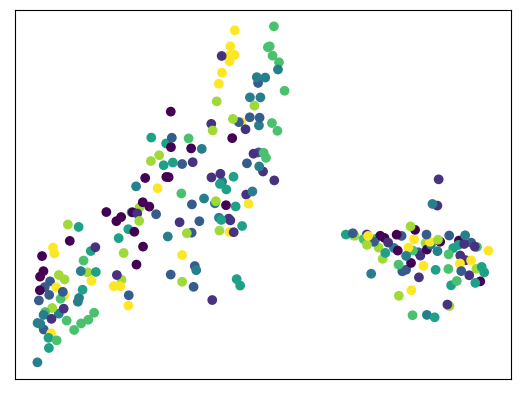

In [8]:
scatter = plt.scatter(transformed_proposed_embed[:, 0], transformed_proposed_embed[:, 1], c=label)
plt.xticks([])
plt.yticks([])
plt.show()